In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Merge the List of Orders and Order Details datasets on the basis of Order ID.Calculate the total sales (Amount) for each category across all orders.


In [52]:
list_of_orders = pd.read_csv("C:/Users/ANSHUJ/Desktop/Jar test/List_of_Orders_55FFC79CF8.csv")
order_details = pd.read_csv("C:/Users/ANSHUJ/Desktop/Jar test/Order_Details_19795F61CF.csv")

merged_data = pd.merge(list_of_orders, order_details, on="Order ID")

In [33]:
print(merged_data.head(10))

  Order ID  Order Date CustomerName           State       City  Amount  \
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad  1275.0   
1  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad    66.0   
2  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad     8.0   
3  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad    80.0   
4  B-25602  01-04-2018        Pearl     Maharashtra       Pune   168.0   
5  B-25602  01-04-2018        Pearl     Maharashtra       Pune   424.0   
6  B-25602  01-04-2018        Pearl     Maharashtra       Pune  2617.0   
7  B-25602  01-04-2018        Pearl     Maharashtra       Pune   561.0   
8  B-25602  01-04-2018        Pearl     Maharashtra       Pune   119.0   
9  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal  1355.0   

   Profit  Quantity     Category      Sub-Category  
0 -1148.0         7    Furniture         Bookcases  
1   -12.0         5     Clothing             Stole  
2    -2.0         3     Cl

In [34]:
total_sales_by_category = merged_data.groupby("Category")["Amount"].sum().reset_index()
total_sales_by_category.rename(columns={"Amount": "Total Sales"}, inplace=True)

In [29]:
print(total_sales_by_category)

      Category  Total Sales
0     Clothing     139054.0
1  Electronics     165267.0
2    Furniture     127181.0



#For each category, calculate the average profit per order and total profit margin
(profit as a percentage of Amount)


In [35]:
total_profit_by_category = merged_data.groupby("Category")["Profit"].sum().reset_index()

num_orders_by_category = merged_data.groupby("Category")["Order ID"].nunique().reset_index()
num_orders_by_category.rename(columns={"Order ID": "Number of Orders"}, inplace=True)

profit_analysis = pd.merge(total_profit_by_category, num_orders_by_category, on="Category")

profit_analysis["Average Profit per Order"] = profit_analysis["Profit"] / profit_analysis["Number of Orders"]
profit_analysis = pd.merge(profit_analysis, total_sales_by_category, on="Category")

profit_analysis["Total Profit Margin (%)"] = (profit_analysis["Profit"] / profit_analysis["Total Sales"]) * 100

print("\nProfit Analysis by Category:")
print(profit_analysis)


Profit Analysis by Category:
      Category   Profit  Number of Orders  Average Profit per Order  \
0     Clothing  11163.0               393                 28.404580   
1  Electronics  10494.0               204                 51.441176   
2    Furniture   2298.0               186                 12.354839   

   Total Sales  Total Profit Margin (%)  
0     139054.0                 8.027817  
1     165267.0                 6.349725  
2     127181.0                 1.806874  


#Identify the top-performing and underperforming categories based on these
metrics. Also, suggest reasons for their performance diEerences


In [32]:
profit_analysis["Sales Rank"] = profit_analysis["Total Sales"].rank(ascending=False)

profit_analysis["Profit per Order Rank"] = profit_analysis["Average Profit per Order"].rank(ascending=False)
profit_analysis["Profit Margin Rank"] = profit_analysis["Total Profit Margin (%)"].rank(ascending=False)

top_performing = profit_analysis.sort_values(by="Sales Rank").head(1)
underperforming = profit_analysis.sort_values(by="Sales Rank").tail(1)

print("\nTop-Performing Category:")
print(top_performing)

print("\nUnderperforming Category:")
print(underperforming)


Top-Performing Category:
      Category   Profit  Number of Orders  Average Profit per Order  \
1  Electronics  10494.0               204                 51.441176   

   Total Sales  Total Profit Margin (%)  Sales Rank  Profit per Order Rank  \
1     165267.0                 6.349725         1.0                    1.0   

   Profit Margin Rank  
1                 2.0  

Underperforming Category:
    Category  Profit  Number of Orders  Average Profit per Order  Total Sales  \
2  Furniture  2298.0               186                 12.354839     127181.0   

   Total Profit Margin (%)  Sales Rank  Profit per Order Rank  \
2                 1.806874         3.0                    3.0   

   Profit Margin Rank  
2                 3.0  


#Using the Sales Target dataset, calculate the percentage change in target sales
for the Furniture category month-over-month.

In [49]:
import pandas as pd
sales_target = pd.read_csv("C:/Users/ANSHUJ/Desktop/Jar test/Sales_target_DD2E9B96A0.csv")
furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()

furniture_target["Percentage Change"] = furniture_target["Target"].pct_change() * 100

print("\nPercentage Change in Target Sales for Furniture:")
print(furniture_target[["Month of Order Date", "Percentage Change"]])


Percentage Change in Target Sales for Furniture:
   Month of Order Date  Percentage Change
0               Apr-18                NaN
1               May-18           0.961538
2               Jun-18           0.952381
3               Jul-18           1.886792
4               Aug-18           0.925926
5               Sep-18           0.917431
6               Oct-18           0.909091
7               Nov-18           1.801802
8               Dec-18           0.884956
9               Jan-19           0.877193
10              Feb-19           0.869565
11              Mar-19           1.724138


#Identify Months with Significant Target Fluctuations

In [50]:
average_change = furniture_target["Percentage Change"].mean()

significant_fluctuations = furniture_target[abs(furniture_target["Percentage Change"]) > abs(average_change)]

print("\nMonths with Significant Target Fluctuations:")
print(significant_fluctuations[["Month of Order Date", "Percentage Change"]])


Months with Significant Target Fluctuations:
   Month of Order Date  Percentage Change
3               Jul-18           1.886792
7               Nov-18           1.801802
11              Mar-19           1.724138


#Suggest Strategies for Aligning Targets


#Identify Top 5 States by Order Count

In [54]:
order_count_by_state = list_of_orders.groupby("State")["Order ID"].count().reset_index()
order_count_by_state.rename(columns={"Order ID": "Order Count"}, inplace=True)

top_5_states = order_count_by_state.sort_values(by="Order Count", ascending=False).head(5)

print("\nTop 5 States by Order Count:")
print(top_5_states)


Top 5 States by Order Count:
             State  Order Count
10  Madhya Pradesh          101
11     Maharashtra           90
14       Rajasthan           32
4          Gujarat           27
13          Punjab           25


#From the List of Orders dataset, identify the top 5 states with the highest order
count. For each of these states, calculate the total sales and average profit

In [55]:
top_5_states_data = pd.merge(top_5_states, merged_data, on="State")

state_performance = top_5_states_data.groupby("State").agg(
    Total_Sales=("Amount", "sum"),
    Average_Profit=("Profit", "mean")
).reset_index()


print("\nTotal Sales and Average Profit for Top 5 States:")
print(state_performance)


Total Sales and Average Profit for Top 5 States:
            State  Total_Sales  Average_Profit
0         Gujarat      21058.0        5.344828
1  Madhya Pradesh     105140.0       16.326471
2     Maharashtra      95348.0       21.296552
3          Punjab      16786.0      -10.150000
4       Rajasthan      21149.0       16.986486


#Highlight any regional disparities in sales or profitability. Suggest regions or cities
that should be prioritized for improvement.


In [58]:
state_performance["Sales Disparity"] = state_performance["Total_Sales"] - state_performance["Total_Sales"].mean()
state_performance["Profit Disparity"] = state_performance["Average_Profit"] - state_performance["Average_Profit"].mean()


print("\nRegional Disparities in Sales and Profit:")
print(state_performance[["State", "Sales Disparity", "Profit Disparity"]])


Regional Disparities in Sales and Profit:
            State  Sales Disparity  Profit Disparity
0         Gujarat         -30838.2         -4.616040
1  Madhya Pradesh          53243.8          6.365603
2     Maharashtra          43451.8         11.335684
3          Punjab         -35110.2        -20.110867
4       Rajasthan         -30747.2          7.025619


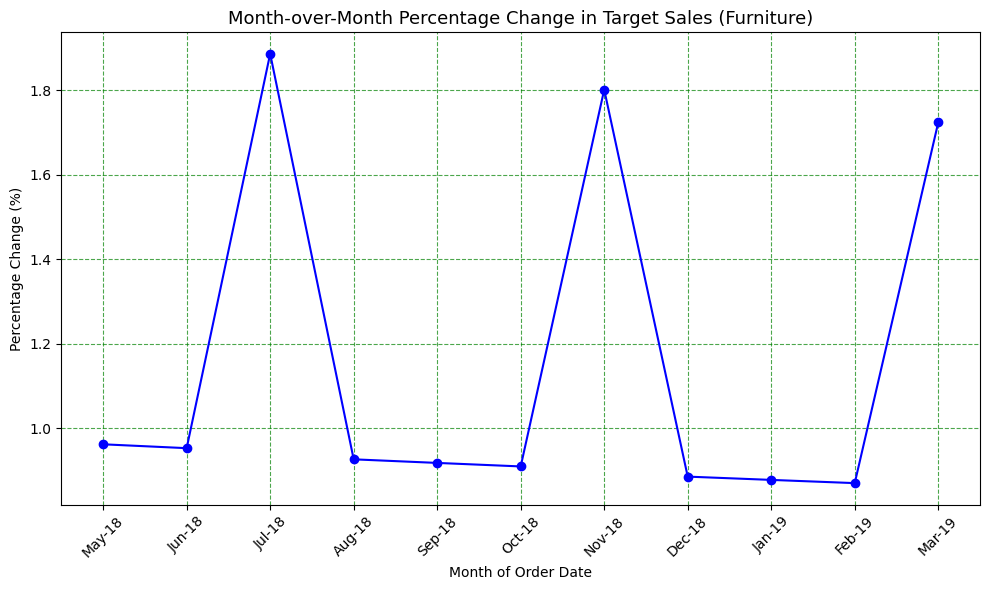

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


sales_target = pd.read_csv("Sales_target_DD2E9B96A0.csv")


furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()


furniture_target.loc[:, "Percentage Change"] = furniture_target["Target"].pct_change() * 100

furniture_target = furniture_target.dropna()

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(
    furniture_target["Month of Order Date"],  # X-axis: Months
    furniture_target["Percentage Change"],   # Y-axis: Percentage Change
    marker="o",                             # Add markers to data points
    linestyle="-",                          # Solid line style
    color="blue",                           # Line color
    label="Percentage Change"               # Label for the legend
)

plt.title("Month-over-Month Percentage Change in Target Sales (Furniture)", fontsize=13)
plt.xlabel("Month of Order Date", fontsize=10)
plt.ylabel("Percentage Change (%)", fontsize=10)

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7, color="green")

plt.tight_layout()  
plt.show()

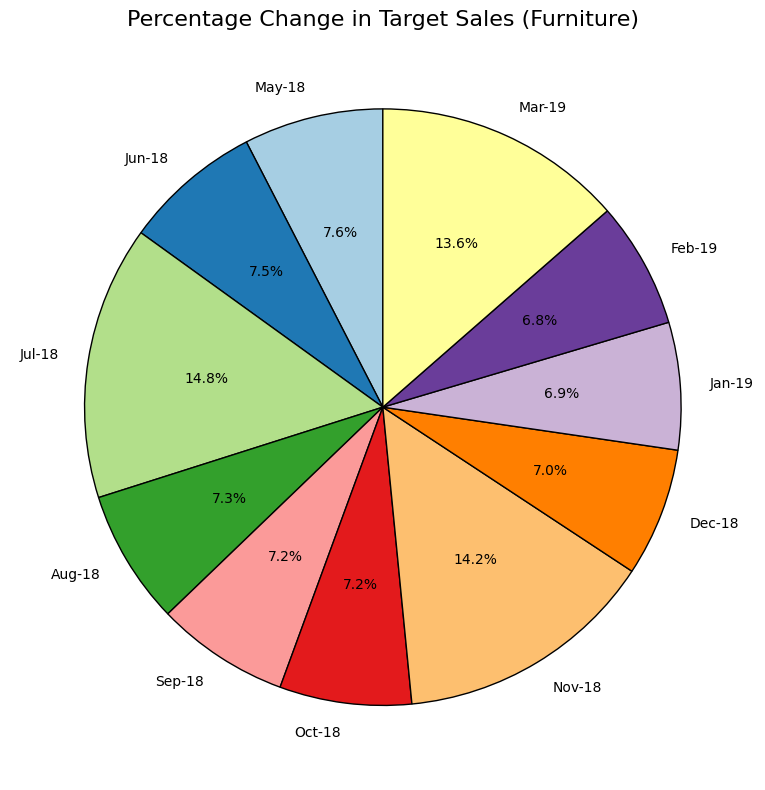

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

sales_target = pd.read_csv("Sales_target_DD2E9B96A0.csv")

furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()

furniture_target.loc[:, "Percentage Change"] = furniture_target["Target"].pct_change() * 100

furniture_target = furniture_target.dropna()

# Plot the data
plt.figure(figsize=(8,8))
plt.pie(
    furniture_target["Percentage Change"],  # Data for the pie chart
    labels=furniture_target["Month of Order Date"],  # Labels for each slice
    autopct="%1.1f%%",  # Display percentage values on the chart
    startangle=90,  # Start the first slice at 90 degrees
    colors=plt.cm.Paired.colors,  # Use a color map for the slices
    wedgeprops={"edgecolor": "black", "linewidth": 1},  # Add black edges to slices
)


plt.title("Percentage Change in Target Sales (Furniture)", fontsize=16)

# Show the plot
plt.tight_layout()  
plt.show()

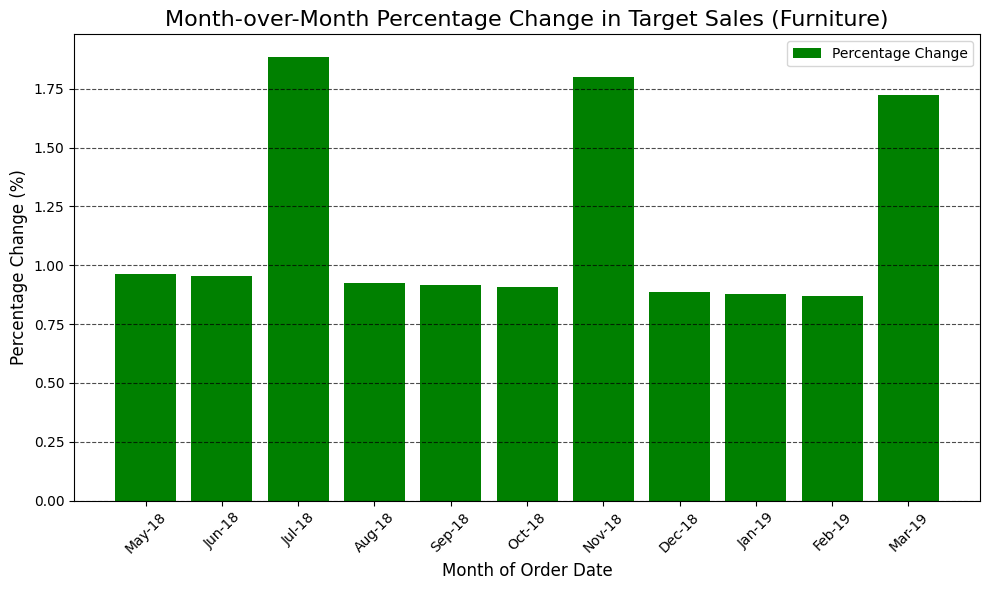

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

sales_target = pd.read_csv("Sales_target_DD2E9B96A0.csv")

furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()

furniture_target.loc[:, "Percentage Change"] = furniture_target["Target"].pct_change() * 100

furniture_target = furniture_target.dropna()
plt.figure(figsize=(10, 6)) 

plt.bar(
    furniture_target["Month of Order Date"],  # X-axis: Months
    furniture_target["Percentage Change"],    # Y-axis: Percentage Change
    color="green",                            # Bar color
    label="Percentage Change"                # Label for the legend
)


plt.title("Month-over-Month Percentage Change in Target Sales (Furniture)", fontsize=16)
plt.xlabel("Month of Order Date", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)


plt.xticks(rotation=45)

plt.grid(True, linestyle="--" ,color="black" ,alpha=0.7, axis="y")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

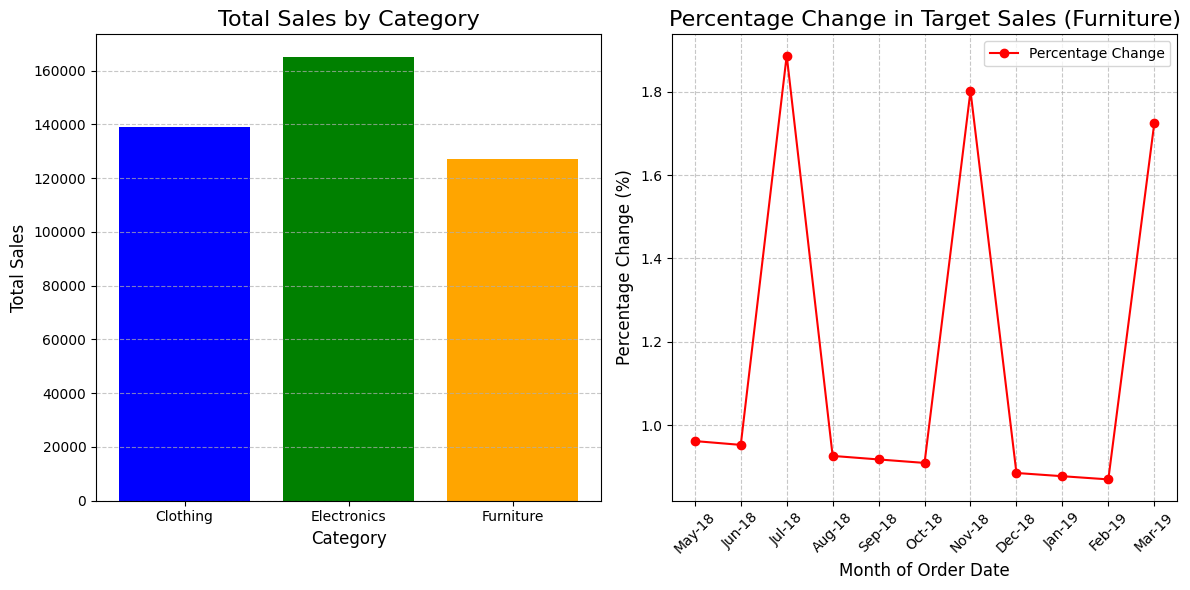

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

list_of_orders = pd.read_csv("C:/Users/ANSHUJ/Desktop/Jar test/List_of_Orders_55FFC79CF8.csv")
order_details = pd.read_csv("C:/Users/ANSHUJ/Desktop/Jar test/Order_Details_19795F61CF.csv")
sales_target = pd.read_csv("C:/Users/ANSHUJ/Desktop/Jar test/Sales_target_DD2E9B96A0.csv")

merged_data = pd.merge(list_of_orders, order_details, on="Order ID")

total_sales_by_category = merged_data.groupby("Category")["Amount"].sum().reset_index()

furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()

furniture_target.loc[:, "Percentage Change"] = furniture_target["Target"].pct_change() * 100
furniture_target = furniture_target.dropna()  # Drop the first row (NaN)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)  # Subplot 1
plt.bar(
    total_sales_by_category["Category"],  # X-axis: Categories
    total_sales_by_category["Amount"],    # Y-axis: Total Sales
    color=["blue", "green", "orange"],    # Bar colors
)
plt.title("Total Sales by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7, axis="y")

plt.subplot(1, 2, 2)  # Subplot 2
plt.plot(
    furniture_target["Month of Order Date"],  # X-axis: Months
    furniture_target["Percentage Change"],   # Y-axis: Percentage Change
    marker="o",                             # Add markers
    linestyle="-",                          # Solid line
    color="red",                            # Line color
    label="Percentage Change"               # Label for legend
)
plt.title("Percentage Change in Target Sales (Furniture)", fontsize=16)
plt.xlabel("Month of Order Date", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

# Step 8: Show the plots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()